<a href="https://colab.research.google.com/github/sho-choma-tech/Kaggle/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os 
import pandas as pd
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df_train = pd.read_csv('drive/My Drive/Kaggle/Titanic/train.csv')
df_test = pd.read_csv('drive/My Drive/Kaggle/Titanic/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_train.info()
print('------------------')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    in

In [8]:
for col in df_train.columns:
  print(col, round(df_train[col].isnull().sum() / len(df_train) * 100, 2), '%')
print('---------------------------------')
for col in df_test.columns:
  print(col, round(df_test[col].isnull().sum() / len(df_test) * 100, 2), '%')

PassengerId 0.0 %
Survived 0.0 %
Pclass 0.0 %
Name 0.0 %
Sex 0.0 %
Age 19.87 %
SibSp 0.0 %
Parch 0.0 %
Ticket 0.0 %
Fare 0.0 %
Cabin 77.1 %
Embarked 0.22 %
---------------------------------
PassengerId 0.0 %
Pclass 0.0 %
Name 0.0 %
Sex 0.0 %
Age 20.57 %
SibSp 0.0 %
Parch 0.0 %
Ticket 0.0 %
Fare 0.24 %
Cabin 78.23 %
Embarked 0.0 %


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


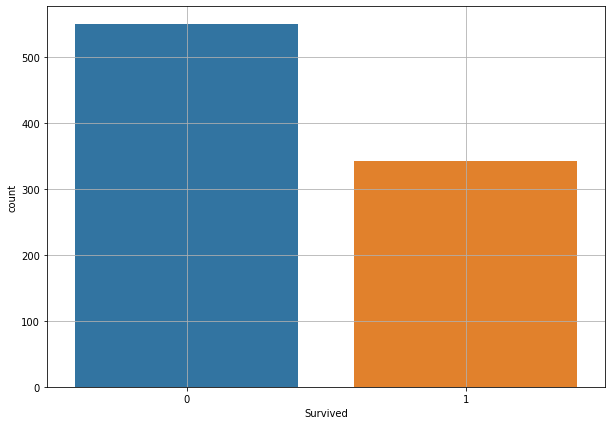

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Survived', data = df_train)
plt.grid(True)

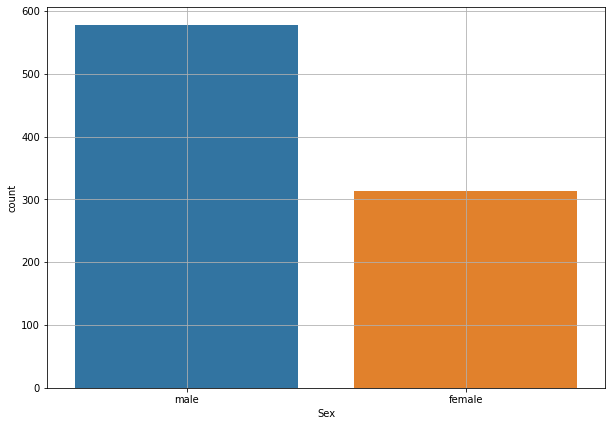

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Sex', data = df_train)
plt.grid(True)

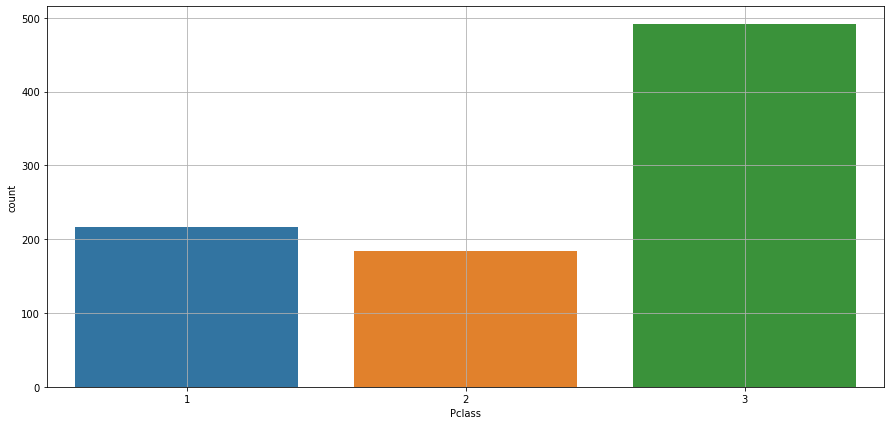

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'Pclass', data = df_train)
plt.grid(True)

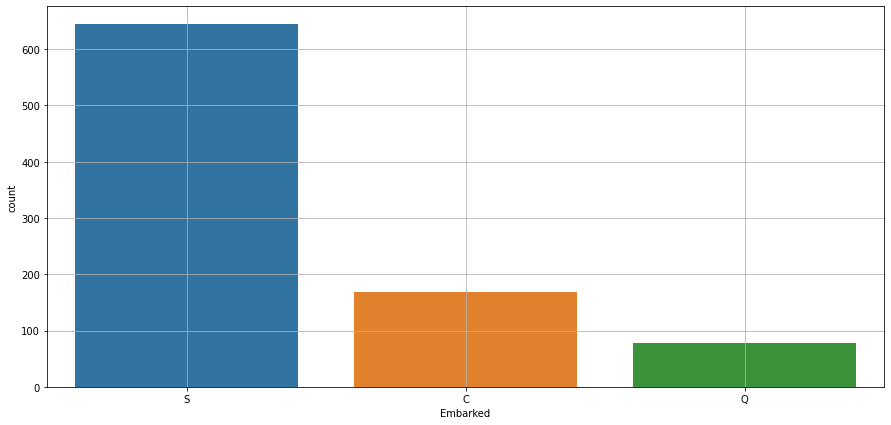

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'Embarked', data = df_train)
plt.grid(True)

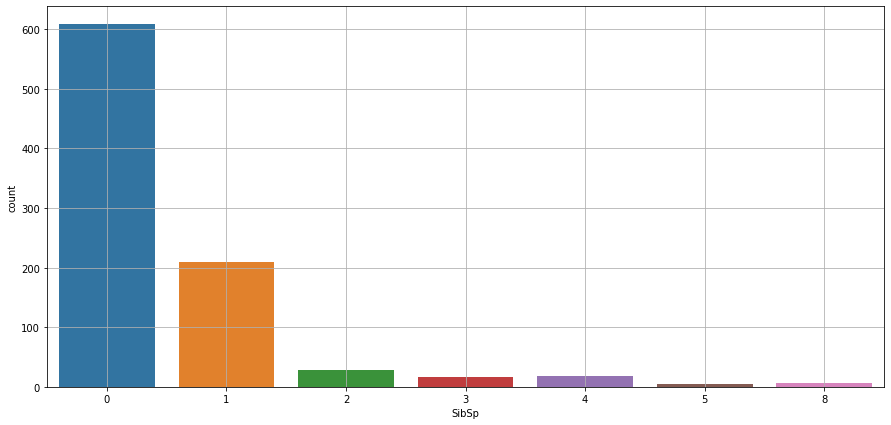

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'SibSp', data = df_train)
plt.grid(True)

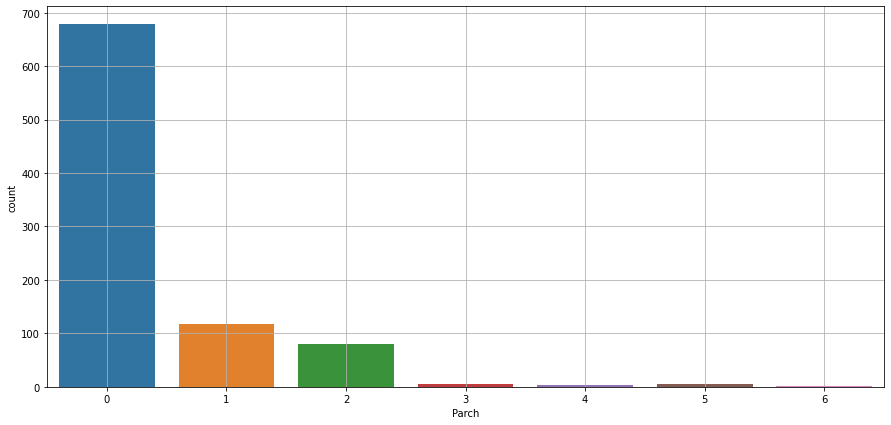

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'Parch', data = df_train)
plt.grid(True)

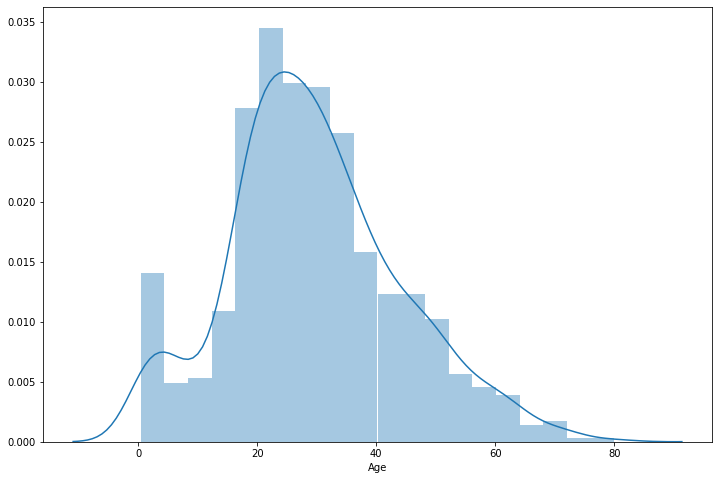

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(df_train.Age, hist = True, kde=True)
plt.show()

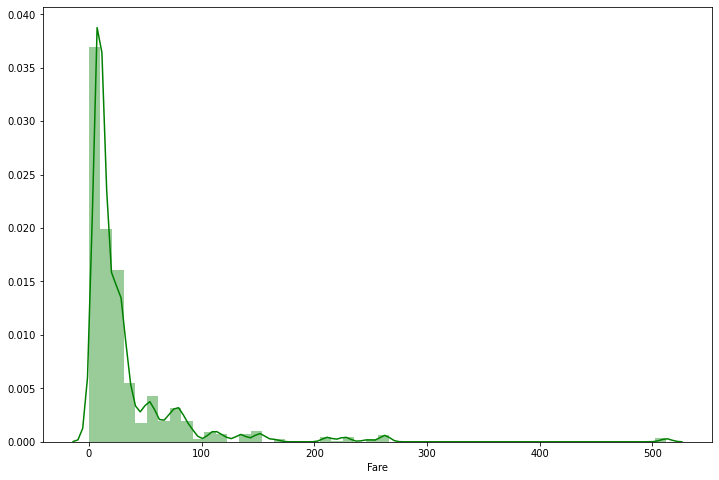

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(df_train.Fare, hist = True, kde=True, color='g')

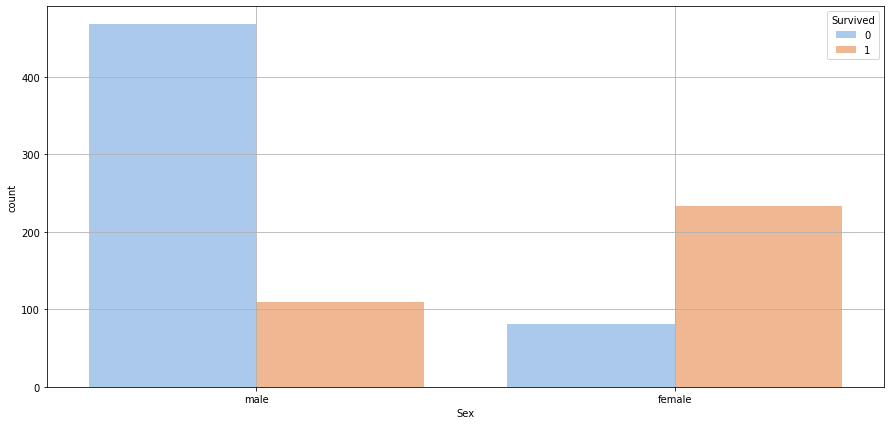

In [18]:
plt.figure(figsize=(15, 7))
sns.countplot(df_train.Sex, hue=df_train.Survived, palette='pastel')
plt.grid(True)

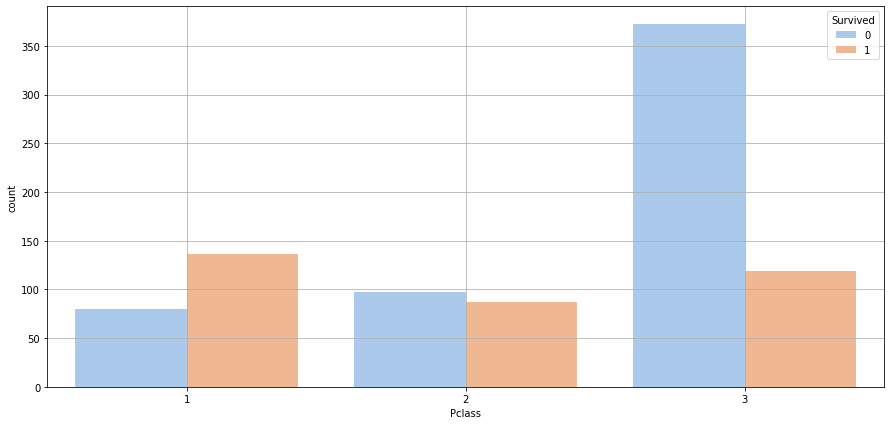

In [19]:
plt.figure(figsize=(15, 7))
sns.countplot(df_train.Pclass, hue=df_train.Survived, palette='pastel')
plt.grid(True)

Missing Values

In [20]:
data = pd.concat([df_train, df_test])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
for i in data.columns:
  print(i, round(data[i].isnull().sum() / len(data) * 100, 2), '%')

PassengerId 0.0 %
Survived 31.93 %
Pclass 0.0 %
Name 0.0 %
Sex 0.0 %
Age 20.09 %
SibSp 0.0 %
Parch 0.0 %
Ticket 0.0 %
Fare 0.08 %
Cabin 77.46 %
Embarked 0.15 %


In [22]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [23]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Figure size 1080x504 with 0 Axes>

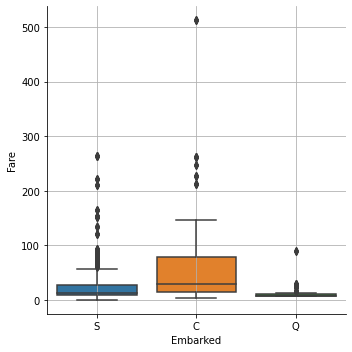

In [24]:
plt.figure(figsize=(15,7))
sns.catplot(x = 'Embarked', y = 'Fare', data = data, kind='box')
plt.grid(True)

In [25]:
data['Embarked'] = data.Embarked.fillna('C')

In [26]:
data[data.Fare.isnull()]
data['Fare'] = data.Fare.fillna(data.Fare.median())

Median :  28.0
Mean :  29.881137667304014


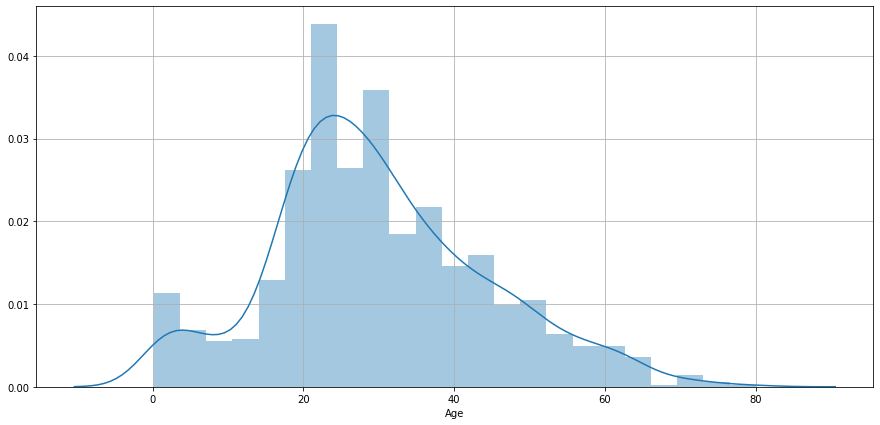

In [27]:
plt.figure(figsize=(15,7))
sns.distplot(data.Age, kde=True)
plt.grid(True)

print('Median : ', data.Age.median())
print('Mean : ', data.Age.mean())

data['Age'] = data.Age.fillna(data.Age.median())

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,2
1,1.0,1,0,38.0,1,0,71.2833,0
2,1.0,3,0,26.0,0,0,7.9250,2
3,1.0,1,0,35.0,1,0,53.1000,2
4,0.0,3,1,35.0,0,0,8.0500,2


In [32]:
train = data.iloc[0: (data.shape[0] - df_test.shape[0])]
test = data.iloc[df_train.shape[0] : ]

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,2
1,1.0,1,0,38.0,1,0,71.2833,0
2,1.0,3,0,26.0,0,0,7.9250,2
3,1.0,1,0,35.0,1,0,53.1000,2
4,0.0,3,1,35.0,0,0,8.0500,2


In [34]:
test.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,NaN,3,1,28.0,0,0,8.0500,2
414,NaN,1,0,39.0,0,0,108.9000,0
415,NaN,3,1,38.5,0,0,7.2500,2
416,NaN,3,1,28.0,0,0,8.0500,2
417,NaN,3,1,28.0,1,1,22.3583,0


In [35]:
X = train.drop('Survived', axis=1)
y = train.Survived

Random Forest

In [36]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators' : [400,500,600,700]
    , 'max_features' : [5,6,7,8,9,10]
    , 'min_samples_split' : [5,6,7,8,9,10]
}

In [ ]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=21, n_jobs=-1, verbose=1).fit(X, y)

Fitting 21 folds for each of 144 candidates, totalling 3024 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 20.2min


In [ ]:
rf_cv_model

In [ ]:
best_params = rf_cv_model.best_params_
print(best_params)

In [90]:
rf = RandomForestClassifier(
    max_features = best_params['max_features']
    , min_samples_split = best_params['min_samples_split']
    , n_estimators = best_params['n_estimators']
).fit(X, y)

In [91]:
y_pred = rf.predict(X)